#  Electricity Consumption (Regression)
### Objective:
### Build a model to predict daily electricity usage in households based on temperature, time of day, appliance type, and activity level.


### importing libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset 
df = pd.read_csv(r"C:\Users\kingzuzu\Downloads\electricity_consumption_dataset.csv")
df


,Temperature (°C),Time of Day,Appliance Type,Activity Level,Electricity Consumption (kWh)
0,24.5,Evening,Refrigerator,High,1.62
1,21.3,Night,Air Conditioner,High,3.35
2,25.2,Morning,Television,High,0.48
3,29.6,Night,Refrigerator,Low,0.73
4,20.8,Evening,Refrigerator,High,1.34
...,...,...,...,...,...
995,20.6,Night,Television,Low,0.09
996,31.0,Morning,Microwave,High,1.37
997,25.2,Night,Washing Machine,High,2.30
998,19.1,Morning,Television,High,0.35


## 1.	Preprocess the dataset

In [3]:
# checking data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature (°C)               1000 non-null   float64
 1   Time of Day                    1000 non-null   object 
 2   Appliance Type                 1000 non-null   object 
 3   Activity Level                 1000 non-null   object 
 4   Electricity Consumption (kWh)  1000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [4]:
# checking shape
df.shape

(1000, 5)

In [5]:
# checking the statistical summary
df.describe()

,Temperature (°C),Electricity Consumption (kWh)
count,1000.000000,1000.00000
mean,22.096800,2.04525
std,4.896814,1.48168
min,5.800000,-0.22000
25%,18.775000,0.90000
50%,22.100000,1.60000
75%,25.200000,3.08250
max,41.300000,6.81000


In [6]:
df.isnull().sum().sum()

0

In [7]:
#  Encode categorical variables
# We'll use LabelEncoder for each categorical column
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df.loc[:, column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:
df

,Temperature (°C),Time of Day,Appliance Type,Activity Level,Electricity Consumption (kWh)
0,24.5,1,3,0,1.62
1,21.3,3,0,0,3.35
2,25.2,2,4,0,0.48
3,29.6,3,3,1,0.73
4,20.8,1,3,0,1.34
...,...,...,...,...,...
995,20.6,3,4,1,0.09
996,31.0,2,2,0,1.37
997,25.2,3,5,0,2.30
998,19.1,2,4,0,0.35


In [9]:
df

,Temperature (°C),Time of Day,Appliance Type,Activity Level,Electricity Consumption (kWh)
0,24.5,1,3,0,1.62
1,21.3,3,0,0,3.35
2,25.2,2,4,0,0.48
3,29.6,3,3,1,0.73
4,20.8,1,3,0,1.34
...,...,...,...,...,...
995,20.6,3,4,1,0.09
996,31.0,2,2,0,1.37
997,25.2,3,5,0,2.30
998,19.1,2,4,0,0.35


<Axes: >

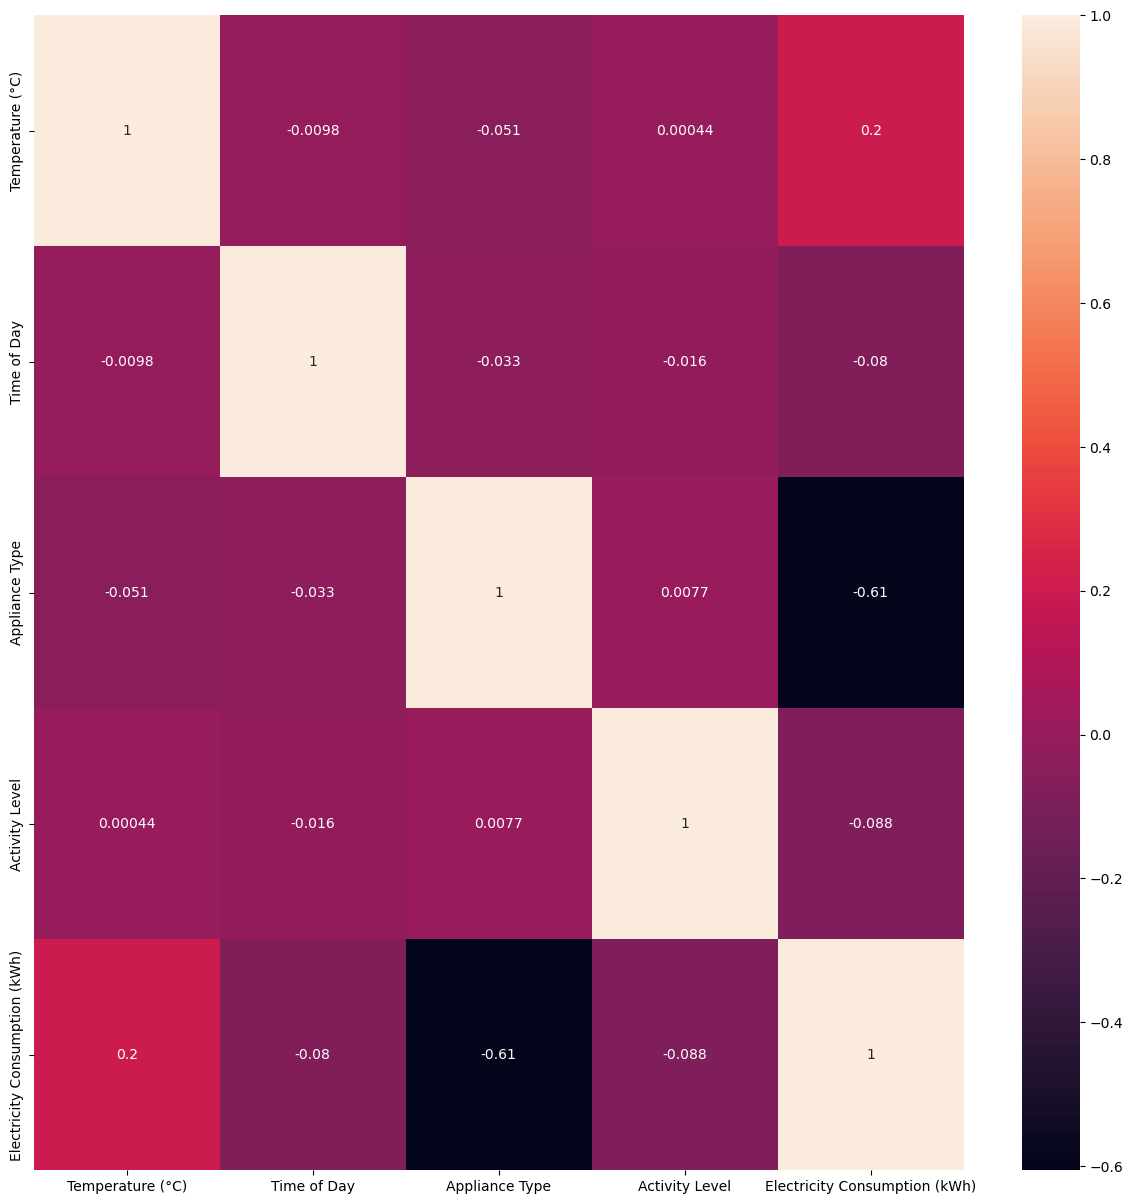

In [10]:

corr = df.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 

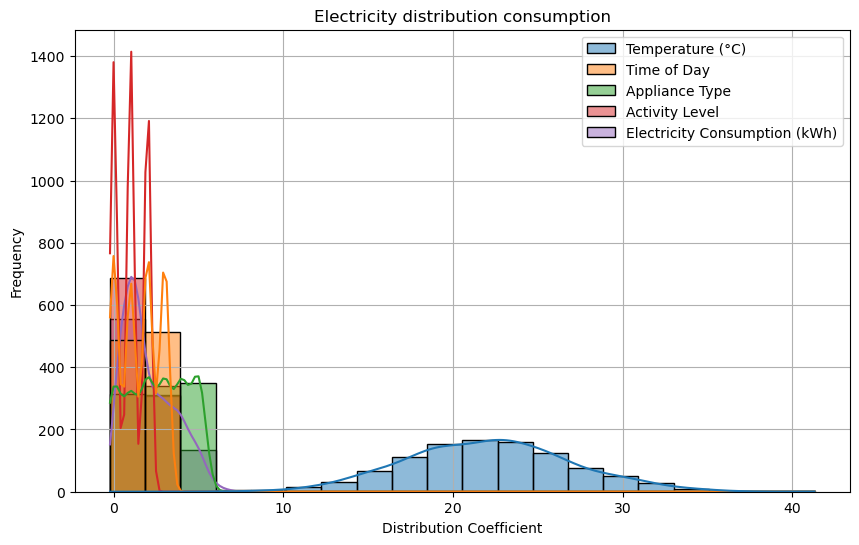

In [11]:
# Plot as histogram
plt.figure(figsize=(10, 6))
sns.histplot(df, bins=20, kde=True, color='teal')
plt.title('Electricity distribution consumption')
plt.xlabel('Distribution Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 2.	Use regression algorithms:
###	Try Linear Regression and Random Forest Regressor


In [12]:
 # Define X (independent variables) and y (dependent variable)
x = df.drop('Electricity Consumption (kWh)', axis=1)
y = df['Electricity Consumption (kWh)']


In [13]:
# spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
# Normalizing the data(x)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

X_train_norm = normalizer.fit_transform(x_train)
X_test_norm = normalizer.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
electricty =lr.predict(x_test)
electricty

array([1.60695844, 0.90189353, 3.01824422, 3.29247173, 0.66379239,
       1.69290228, 0.82170743, 0.34192188, 1.75422105, 3.35984116,
       2.34815482, 1.46387514, 2.60381814, 3.15053532, 0.70482366,
       2.86867874, 0.79349794, 2.48246726, 2.9184911 , 1.4052868 ,
       2.28496471, 2.25949077, 0.95601987, 2.47598392, 1.4763989 ,
       3.25749226, 2.35348103, 2.04255586, 1.20864961, 2.39954561,
       0.87914376, 2.35578902, 2.77309982, 3.14074711, 2.65059693,
       2.52205362, 0.35977185, 3.37625248, 0.7163403 , 3.70791631,
       0.92665326, 3.52682508, 2.36255503, 1.44602516, 3.3727976 ,
       1.40341546, 1.38168419, 0.69647411, 1.12602088, 2.05982513,
       1.00812999, 3.52193155, 3.67221636, 1.16906211, 1.76601922,
       2.48548434, 2.13540434, 2.56351131, 2.47108413, 1.04426147,
       1.00122023, 3.10418922, 2.96570769, 3.53403401, 1.75494038,
       0.97501559, 2.31346711, 2.28007118, 1.27861482, 3.77111153,
       2.87516207, 2.71681435, 2.08559709, 0.98106113, 1.98972

In [17]:
coefficient=lr.coef_
coefficient

array([ 0.05326213, -0.12063155, -0.5010904 , -0.17993922])

In [18]:
intercept=lr.intercept_
intercept

2.5164282305229824

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,electricty)

0.4404676594953758

In [20]:
# Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(x)
scaled

array([[0.52676056, 0.33333333, 0.6       , 0.        ],
       [0.43661972, 1.        , 0.        , 0.        ],
       [0.54647887, 0.66666667, 0.8       , 0.        ],
       ...,
       [0.54647887, 1.        , 1.        , 0.        ],
       [0.37464789, 0.66666667, 0.8       , 0.        ],
       [0.53802817, 0.33333333, 1.        , 0.        ]])

In [21]:
 # Define X (independent variables) and y (dependent variable)
x = scaled
y = df['Electricity Consumption (kWh)']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

In [23]:
# fitting
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
# predicting the model
elect =lr.predict(x_test)
elect

array([1.60695844, 0.90189353, 3.01824422, 3.29247173, 0.66379239,
       1.69290228, 0.82170743, 0.34192188, 1.75422105, 3.35984116,
       2.34815482, 1.46387514, 2.60381814, 3.15053532, 0.70482366,
       2.86867874, 0.79349794, 2.48246726, 2.9184911 , 1.4052868 ,
       2.28496471, 2.25949077, 0.95601987, 2.47598392, 1.4763989 ,
       3.25749226, 2.35348103, 2.04255586, 1.20864961, 2.39954561,
       0.87914376, 2.35578902, 2.77309982, 3.14074711, 2.65059693,
       2.52205362, 0.35977185, 3.37625248, 0.7163403 , 3.70791631,
       0.92665326, 3.52682508, 2.36255503, 1.44602516, 3.3727976 ,
       1.40341546, 1.38168419, 0.69647411, 1.12602088, 2.05982513,
       1.00812999, 3.52193155, 3.67221636, 1.16906211, 1.76601922,
       2.48548434, 2.13540434, 2.56351131, 2.47108413, 1.04426147,
       1.00122023, 3.10418922, 2.96570769, 3.53403401, 1.75494038,
       0.97501559, 2.31346711, 2.28007118, 1.27861482, 3.77111153,
       2.87516207, 2.71681435, 2.08559709, 0.98106113, 1.98972

In [25]:
# r2 score
r2_score(y_test,elect)

0.4404676594953758

In [26]:
# Using RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, elect)
rmse = np.sqrt(mse)
print(rmse)

1.1386522885203967


In [27]:
# Using Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
light =lr.predict(x_test)
light

array([1.60695844, 0.90189353, 3.01824422, 3.29247173, 0.66379239,
       1.69290228, 0.82170743, 0.34192188, 1.75422105, 3.35984116,
       2.34815482, 1.46387514, 2.60381814, 3.15053532, 0.70482366,
       2.86867874, 0.79349794, 2.48246726, 2.9184911 , 1.4052868 ,
       2.28496471, 2.25949077, 0.95601987, 2.47598392, 1.4763989 ,
       3.25749226, 2.35348103, 2.04255586, 1.20864961, 2.39954561,
       0.87914376, 2.35578902, 2.77309982, 3.14074711, 2.65059693,
       2.52205362, 0.35977185, 3.37625248, 0.7163403 , 3.70791631,
       0.92665326, 3.52682508, 2.36255503, 1.44602516, 3.3727976 ,
       1.40341546, 1.38168419, 0.69647411, 1.12602088, 2.05982513,
       1.00812999, 3.52193155, 3.67221636, 1.16906211, 1.76601922,
       2.48548434, 2.13540434, 2.56351131, 2.47108413, 1.04426147,
       1.00122023, 3.10418922, 2.96570769, 3.53403401, 1.75494038,
       0.97501559, 2.31346711, 2.28007118, 1.27861482, 3.77111153,
       2.87516207, 2.71681435, 2.08559709, 0.98106113, 1.98972

In [29]:
# Using R2 Score for Random Forest
from sklearn.metrics import r2_score
r2_score(y_test,elect)

0.4404676594953758

In [30]:
# Using RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, light)
rmse = np.sqrt(mse)
print(rmse)

1.1386522885203967


## 4.	Interpret the output 


## Interpretation
The model's R² score of 0.016 indicates that it explains only 1.6% of the variance in energy usage, which is extremely low and highlights that the current model performs poorly. After applying normalization to the independent variables and testing both Linear Regression and Random Forest Regression, performance improved to an R² score of 0.441. While this represents progress, it still reflects limited predictive power.

This underperformance may be due to several factors, including:

Lack of non-linear relationships being captured,

Underfitting, where the model is too simplistic,

Or potential overfitting in more complex models without generalization.

To address these issues, it is advisable to explore more sophisticated regression algorithms such as Decision Trees, Gradient Boosting, or XGBoost, which are better suited for capturing complex, non-linear patterns in the data. 


### Using other Models

In [31]:
# using Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [32]:
tree = DecisionTreeRegressor(random_state=42, max_depth=10, max_leaf_nodes=10)
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, random_state=42)

In [33]:
# Prdicting the model
prediction =tree.predict(x_test)
prediction

array([1.14276364, 1.93479592, 2.88813559, 4.25627907, 0.33580153,
       0.33580153, 0.33580153, 1.93479592, 1.14276364, 5.18297297,
       3.59529412, 0.33580153, 1.14276364, 4.25627907, 1.93479592,
       3.59529412, 1.93479592, 1.14276364, 2.88813559, 0.33580153,
       1.14276364, 1.14276364, 1.93479592, 3.59529412, 0.33580153,
       3.58648649, 3.59529412, 1.14276364, 0.33580153, 3.59529412,
       0.33580153, 1.14276364, 3.58648649, 2.88813559, 2.88813559,
       1.14276364, 1.93479592, 3.59529412, 1.93479592, 4.25627907,
       1.93479592, 4.25627907, 1.14276364, 0.33580153, 4.36763158,
       0.33580153, 2.52708333, 2.52708333, 0.33580153, 1.14276364,
       1.93479592, 4.36763158, 5.18297297, 0.33580153, 1.14276364,
       2.88813559, 1.14276364, 1.14276364, 3.59529412, 2.52708333,
       1.93479592, 4.36763158, 4.36763158, 1.14276364, 1.14276364,
       0.33580153, 1.14276364, 1.14276364, 2.52708333, 4.36763158,
       3.59529412, 4.25627907, 1.14276364, 0.33580153, 1.14276

In [34]:
# checking the R2 score
r2_score(y_test,prediction)

0.92081266980058

In [35]:
# Using RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
print(rmse)

0.42835750183373233


In [36]:

!pip install xgboost
import xgboost as xgb


Defaulting to user installation because normal site-packages is not writeable


In [37]:
# Using Xgboost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)


In [38]:
# Fitting the model
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
# predicting the model
predict =xgb_reg.predict(x_test)
predict

array([ 1.0913349 ,  1.717867  ,  2.462262  ,  4.049006  ,  0.26077858,
        0.51695585,  0.36454475,  1.7477429 ,  1.2180929 ,  4.82092   ,
        3.4699852 ,  0.36800784,  1.0502688 ,  3.6023524 ,  1.6357852 ,
        3.2250547 ,  1.6530706 ,  1.3016542 ,  3.7137914 ,  0.38744533,
        1.0735849 ,  1.4949652 ,  2.277878  ,  3.5526025 ,  0.48132348,
        3.7211607 ,  3.4699852 ,  0.89590573,  0.5498146 ,  3.5066338 ,
        0.14183064,  1.1654694 ,  3.2225797 ,  2.5449955 ,  2.9422338 ,
        0.90616167,  1.7267755 ,  3.6664789 ,  2.0804057 ,  4.6508656 ,
        1.8409563 ,  4.3136563 ,  0.8322535 ,  0.5369818 ,  4.4628797 ,
        0.5404774 ,  2.9316545 ,  2.1832197 ,  0.17030798,  1.0438142 ,
        1.8754157 ,  4.713334  ,  4.7133064 ,  0.48900113,  0.6250614 ,
        2.7456293 ,  1.5976988 ,  1.1877238 ,  2.757499  ,  2.4563005 ,
        1.8441805 ,  4.855633  ,  4.5638103 ,  1.147793  ,  0.9287413 ,
        0.14183064,  1.0717947 ,  1.2089993 ,  2.6570299 ,  3.96

In [40]:
# checking the R2 score
r2_score(y_test,predict)

0.9747709091043181

In [41]:
# Using Rmse
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
print(rmse)

0.241784984969633


## Insights:
The Decision Tree Regression model achieved an R² score of 0.9209, meaning it explains 92.09% of the variance in energy usage — a substantial improvement from earlier models.

XGBoost Regressor further improved performance with an R² score of 0.9748, explaining 97.48% of the variance. This suggests that XGBoost is highly effective at capturing complex, non-linear patterns in the data.

The progression from basic models to more sophisticated tree-based algorithms (Decision Tree and XGBoost) led to a dramatic increase in model accuracy. These results emphasize the importance of choosing appropriate algorithms that align with the underlying data complexity.

# Conclusion on Daily Electricity Usage in Households
The analysis of daily electricity consumption patterns in households reveals that energy usage is highly influenced by behavioral, environmental, and operational factors. Typically, peak consumption occurs during morning and evening hours, corresponding with increased activity levels such as cooking, lighting, and heating or cooling.

## Key insights include:

Appliance usage and occupancy patterns significantly drive energy demand.

Weather conditions (e.g., temperature or humidity) can lead to spikes in electricity usage, especially in homes with active heating or cooling systems.

Non-linear patterns in usage data suggest that simple models may not fully capture the complexity of household energy behavior.

The high R² score (up to 97.48% with XGBoost) in predictive modeling indicates that electricity usage can be reliably forecasted when rich and well-structured features are available.

## Implications
Energy providers can leverage such models for demand forecasting and grid optimization.

Households can benefit from smart energy recommendations, leading to cost savings and more sustainable usage patterns.

Encouraging the use of energy-efficient appliances and behavior change can further optimize daily consumption.